Word Embeddings em artigos de notícias do New York Times
---------------------------------------------------------------------------------------------

**Universidade Federal de Minas Gerais - Escola de Ciência da Informação**
- **Disciplina**: Representaçoes Distribuídas de Texto e Modelagem de Tópicos
- **Professor**: Renato Rocha
- **Aluno**: Rommel Vieira Carneiro

Os computadores não são bons no processamento de palavras, apenas números. Para solucionar isso, é preciso converter palavras em alguma estrutura numérica por meio de uma representação (números, matrizes, etc). Neste trabalho, foi utilizado o algoritmo Word2Vec do pacote Gensim para a criação de modelos de representações distribuídas de texto em vetores multidimensionais a partir de artigos do New York Times disponível no Kaggle (https://www.kaggle.com/nzalake52/new-york-times-articles). 

Por meio do algoritmo Word2Vec é possível que cada palavra seja representada por um vetor de n dimensões, em que n normalmente varia entre 100 e 300. Para isso, o Word2Vec avalia um conjunto de texto e pontua cada palavra nas dimensões criadas em função das outras palavras que estão próximas (contexto). O algoritmo é classificado como uma aprendizagem não supervisionada que resulta na criação de uma matriz que mapeia cada palavra do vocabulário nas n dimensões do modelo.

Com a matriz resultante é possível avaliar a similaridade entre as palavras do vocabulário, o que possibilita uma série de aplicações. A título de exemplo, ao se procurar um termo em um conjunto de documentos, é possível utilizar palavras similares adicionais para se obter maior revocação nos resultados.

Para criação do modelo é necessário especificar alguns parâmetros, conforme apresentado a seguir:
1. Tamanho do espaço dimensional - Número de dimensões que serão criadas para a representação das palavras
2. Window - Número de palavras próximas utilizadas para a análise de contexto.
3. Algoritmo utilizado - Forma como o algoritmo irá avaliar o contexto, se a partir das palavras ao redor para identificar a palavra destino (CBOW) ou o contrário (SKIP-GRAM)
4. Mínimo de ocorrências - Número mínimo de vezes que uma palavra deve aparecer para ser considerada na matriz resultante.

Neste trabalho, foram criados modelos para as diversas variações destes parâmetros, com exceção do mínimo de ocorrências que foi mantido em 10 para todos os modelos gerados. Ao todo, foram gerados 24 modelos com as seguintes variações: 
1. Tamanho do espaço dimensional: 100, 200 e 300
2. Window: 5 e 10
3. Algoritmo: CBOW e SKIP-GRAM
4. Preparação do texto: com e sem StopWords

O trabalho inicial de preparação dos textos contou com a seguinte estratégia de limpeza do texto: (1) remoção de aspas adicionais, (2) remoção de stop words, (3) remoção de caracteres de pontuação e (4) lematização dos termos. Nos testes preliminares de comparação dos resultados dos modelos, foi observado que o modelo do Google preserva as stop words. Em função disso, foram gerados novos modelos com as stop words para efeito de comparação. 

Na sequência, foram avaliados os resultados de similaridade entre palavras conhecidamente afins e o contrário, palavras que não estão relacioanadas, para identificar o melhor conjunto de parâmetros no conjunto de documentos utilizado. Para comparação, além dos modelos gerados, foi utilizado um modelo previamente treinado pelo Google a partir do acervo de notícias do Google News. Ambos os modelos utilizam bases na língua inglesa.

No conjunto testado, os modelos que tiveram melhor desempenho foram os modelos de dimensão tamanho 100 e com janela de palavras próximas de 5, conforme mostrado na figura a seguir. De maneira feral, os modelos que utilizaram o algoritmo CBOW (Continuous Bag of Words) tiveram melhor resultado que os modelos baseados no SkipGram.

Fontes de Pesquisa:
 - Introdução a Ciência de Dados - Modelagem de Tópicos e agrupamento de documentos (https://github.com/hidroware/aulaRenatoRocha/blob/master/notebooks/heber25-ML_UNSUP_TopicModeling_Clustering.ipynb)
 - Introduction to Word Embeddings (https://towardsdatascience.com/introduction-to-word-embeddings-4cf857b12edc)
 - Word2Vec For Phrases — Learning Embeddings For More Than One Word (https://towardsdatascience.com/word2vec-for-phrases-learning-embeddings-for-more-than-one-word-727b6cf723cf)
 - Gensim - models.word2vec – Word2vec embeddings (https://radimrehurek.com/gensim/models/word2vec.html)
 - Natural Language Processing with Python (https://www.nltk.org/book/)
 - Part of Speech Tagging with Stop words using NLTK in python (https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/)
 - Kaggle - New York Times Articles (https://www.kaggle.com/nzalake52/new-york-times-articles)


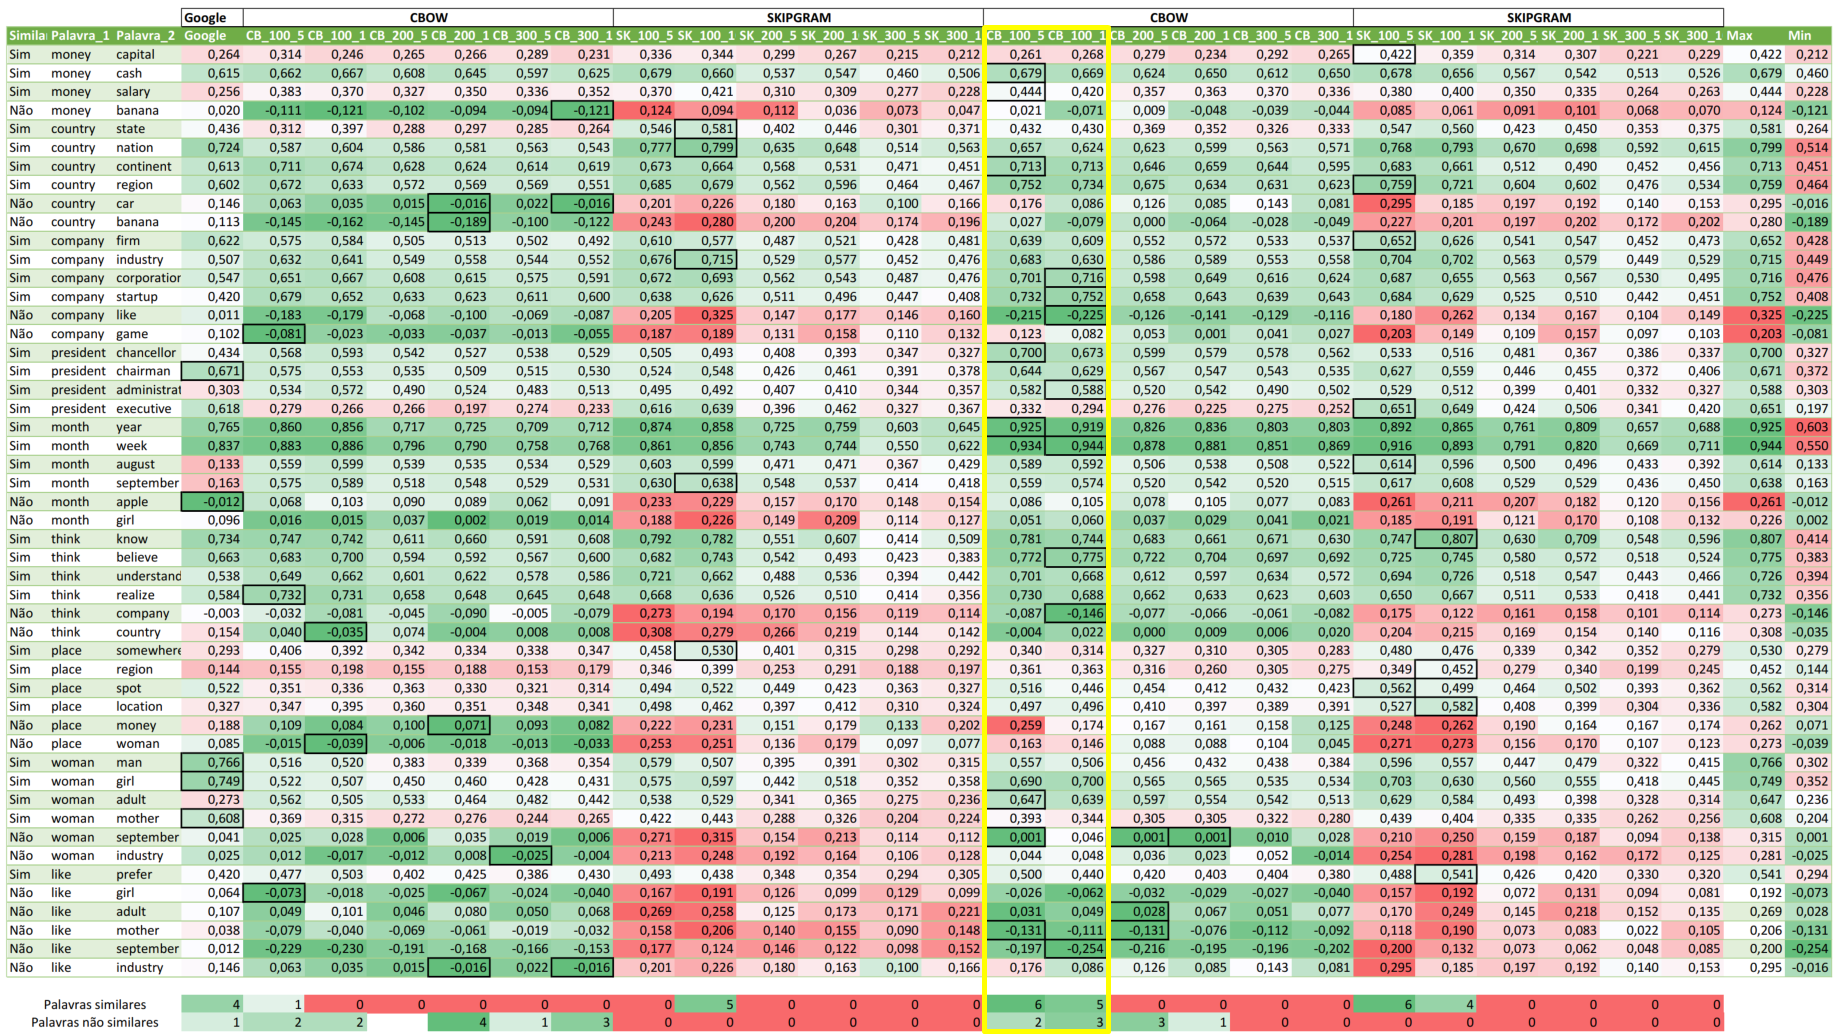

In [71]:
from IPython.display import Image
Image(filename='images\\resultado-word2vec.png', width=800)

In [41]:
import re
import os
import gensim
import string
import pprint
from tabulate import tabulate
from timeit import default_timer as timer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rommel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
# Declara lista de documentos
sentencas = []
base_dir = 'dataset\\'
count_files = 0

for filename in os.listdir(base_dir):
    if filename.endswith(".txt"): 
        count_files += 1 
        # logging.info("Lendo arquivo {0}.".format(filename))
        file = open (base_dir + filename, encoding="utf8")
        file_lines = file.readlines()
        content = ' '.join (file_lines)
        file.close ()
        
        sentencas += nltk.sent_tokenize (content.lower())
        if count_files > 10000: 
            break

print("Número de documentos lidos: ", count_files)
print("Número de sentenças: ", len(sentencas))

#print (sentencas)

Número de documentos lidos:  8888
Número de sentenças:  309712


In [43]:
print (string.punctuation)
stop = set(stopwords.words('english'))
print (stop)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{'where', 'an', 'then', 'any', 'against', 'both', 'above', 'over', 'nor', 'yours', "hadn't", 'wasn', 'up', 'y', 'ma', 'himself', 'what', 'doing', 'him', 'to', 'with', "couldn't", 'being', 'didn', "you've", 'too', 'between', 'here', 'don', "don't", 'does', 'own', 'our', "mightn't", 'o', 'of', 'by', 'can', 'some', "it's", 'once', 'has', "mustn't", 'when', "shan't", 'hers', 'in', 'had', 'do', 'at', 'are', 'haven', 'just', 'but', 'during', 'd', 'ain', 'aren', 'ourselves', 'needn', 'through', 'i', 'further', 'for', 'mustn', 'these', 've', "you'd", 'same', "you're", 'she', 'and', 'be', 'as', "haven't", 'such', 'shan', "needn't", 'so', 'themselves', 'yourself', "aren't", 'yourselves', 'that', "doesn't", 'until', 'on', "shouldn't", 'you', 'hasn', 'whom', 'not', "isn't", "weren't", 'very', 'why', 'shouldn', 'm', "didn't", 'or', 'more', 'after', 'was', 'down', 'few', 'your', "won't", 'about', 'isn', 'its', 'a', 'out', 'there', 'should', "hasn't", "that'll", 'he',

In [51]:
# Preparação e limpeza do texto do corpus
# Estratégias de limpeza adotadas
#   1) Remoção de aspas adicionais
#   2) Remoção de stop words (removida em metade dos modelos gerados)
#   3) Remoção de caracteres de pontuação - !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#   4) Lematização dos termos

# Remove as palavras denecessárias dos documentos

exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(sent):
#    auxterms_free = [word for word, pos in nltk.pos_tag (nltk.word_tokenize(doc)) 
#                        if pos in  {'NN', 'NNS' 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'} ]
#    punc_free = ''.join(ch for ch in " ".join(auxterms_free) if ch not in exclude)
    
    quotes_free   = ''.join(ch for ch in sent if ch not in {'"', '“', '”', '’'})
#    stop_free   = " ".join([i for i in quotes_free.split() if i not in stop])
#    punc_free   = ''.join(ch for ch in stop_free if ch not in exclude)
    punc_free   = ''.join(ch for ch in quotes_free if ch not in exclude)
    normalized  = " ".join(lemma.lemmatize(word) for word in punc_free.split())    
    return normalized

# Executa a limpeza do corpus
start = timer()
corpus = [clean(sent).split() for sent in sentencas]
end = timer()
tempo_execucao = end - start

# Imprime resultados
print('Job done - Tempo de execução (s): ' + str(tempo_execucao))
#print (corpus)

Job done - Tempo de execução (s): 74.58212218100016


In [ ]:
# Principais parâmetros utilizados para a criação do modelo
#    sentences - lista de listas com os textos do corpus
#    min_count - número mínimo de ocorrências para que uma palavra seja mantida
#    size - numero de dimensões do espaço vetorial criado
#    window - distância máxima entre a palavra analisada e as preditas em uma sentença
#    workers - número de threads utilizadas para criação do modelo
#    iter - número de iterações sobre o corpus
#    sg - algoritmo utilizado: skip-gram(1) ou CBOW (0)

def train_model (param_size, param_window, param_algorithm) :
    #param_size = 100
    #param_window = 5
    #param_algorithm = 1
    if param_algorithm == 1 :
        algorithm = 'SKIPGRAM'
    else:
        algorithm = 'CBOW'  
    model_name = 'MODEL-word2vec-NYT-STOP-' + algorithm + '-' + str(param_size) + '-w' + str (param_window) + '.dat'

    # build vocabulary and train model
    start = timer()

    model = gensim.models.Word2Vec(
        sentences = corpus,
        size=param_size,
        window=param_window,
        min_count=10,
        workers=10,
        iter=10, 
        sg=param_algorithm)

    end = timer()
    tempo_execucao = end - start

    # Imprime resultados
    print(model_name + ' - Tempo de execução (s): ' + str(tempo_execucao))
    print(model)
    print('\n')

    # Salva modelo treinado
    model.save ("models\\" + model_name)

# Gera modelos baseados no algoritmo SkipGram
train_model (100, 5, 1)
train_model (100, 10, 1)
train_model (200, 5, 1)
train_model (200, 10, 1)
train_model (300, 5, 1)
train_model (300, 10, 1)

# Gera modelos baseados no algoritmo CBOW (continuous Bag of Words)
train_model (100, 5, 0)
train_model (100, 10, 0)
train_model (200, 5, 0)
train_model (200, 10, 0)
train_model (300, 5, 0)
train_model (300, 10, 0)



In [64]:
# Visualizando os valores nas dimensões de uma palavra
print(model['month'])
print (model['year'])

[-0.87408614 -0.7362783   1.3895358   0.31275013 -1.8324921   1.1948116
  0.58572793 -1.6096838  -0.0422161  -0.4371495  -1.1136446   0.3393972
  0.02683547  0.24844088 -0.72788763 -2.0597038   1.8764933   0.8057494
 -4.2106214  -0.9819669   3.3309445  -0.3055383   1.0047944  -3.1645775
 -0.13329652  1.0390464  -0.02338109 -0.27208075  0.8100512   1.2031177
 -1.502584    2.9686291  -1.410923    2.1864665   1.1001487   1.5200226
 -3.3422983  -1.5510752  -0.38689676  0.6337721   0.686434    0.08302376
  1.6074489   0.872405    0.48575294 -0.47437504  0.35923988 -0.6873019
  1.8702301  -5.2035475  -0.17311637 -2.3178954  -1.1014807   1.3674542
 -1.7725662   1.6357677   1.5224031   0.5709394   1.6068463  -0.7717486
  0.9868377   0.6679888  -0.99949604 -1.8264992   0.7650741   4.2720203
 -0.0891788   0.23849753  0.2107713  -0.40128067  2.2848957   0.4631366
 -2.1099622   1.8446891   1.1656222  -1.833901   -1.6467716   1.8758179
 -1.0037609  -0.86314654 -0.4331708  -2.0108964   0.10085258  2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Carrega modelo gerado com base NYT
prefixo = 'models\\MODEL-word2vec-NYT-'
model_NYT_CBOW_100_5 = gensim.models.Word2Vec.load(prefixo + 'CBOW-100-w5.dat')
model_NYT_CBOW_100_10 = gensim.models.Word2Vec.load(prefixo + 'CBOW-100-w10.dat')

model_NYT_CBOW_200_5 = gensim.models.Word2Vec.load(prefixo + 'CBOW-200-w5.dat')
model_NYT_CBOW_200_10 = gensim.models.Word2Vec.load(prefixo + 'CBOW-200-w10.dat')

model_NYT_CBOW_300_5 = gensim.models.Word2Vec.load(prefixo + 'CBOW-300-w5.dat')
model_NYT_CBOW_300_10 = gensim.models.Word2Vec.load(prefixo + 'CBOW-300-w10.dat')

model_NYT_SKIPGRAM_100_5 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-100-w5.dat')
model_NYT_SKIPGRAM_100_10 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-100-w10.dat')

model_NYT_SKIPGRAM_200_5 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-200-w5.dat')
model_NYT_SKIPGRAM_200_10 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-200-w10.dat')

model_NYT_SKIPGRAM_300_5 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-300-w5.dat')
model_NYT_SKIPGRAM_300_10 = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-300-w10.dat')

prefixo = 'models\\MODEL-word2vec-NYT-STOP-'
model_NYT_CBOW_100_5_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-100-w5.dat')
model_NYT_CBOW_100_10_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-100-w10.dat')

model_NYT_CBOW_200_5_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-200-w5.dat')
model_NYT_CBOW_200_10_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-200-w10.dat')

model_NYT_CBOW_300_5_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-300-w5.dat')
model_NYT_CBOW_300_10_S = gensim.models.Word2Vec.load(prefixo + 'CBOW-300-w10.dat')

model_NYT_SKIPGRAM_100_5_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-100-w5.dat')
model_NYT_SKIPGRAM_100_10_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-100-w10.dat')

model_NYT_SKIPGRAM_200_5_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-200-w5.dat')
model_NYT_SKIPGRAM_200_10_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-200-w10.dat')

model_NYT_SKIPGRAM_300_5_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-300-w5.dat')
model_NYT_SKIPGRAM_300_10_S = gensim.models.Word2Vec.load(prefixo + 'SKIPGRAM-300-w10.dat')


# Carrega modelo do Google 
wv_google_name = 'models\\GoogleNews\\en\\GoogleNews-vectors-negative300.bin'
modelGoogle = gensim.models.KeyedVectors.load_word2vec_format(wv_google_name, binary=True)

In [49]:
# Verifica as palavras mais frequentes do modelo
print(model_NYT_CBOW_100_5_S.wv.index2entity[:200])

print(modelGoogle.wv.index2entity[:200])

['the', 'a', 'of', 'to', 'and', 'in', 'that', 'for', 'it', 'on', 'is', 'said', 'wa', 'The', 'with', 'Mr', 'he', 'at', 'his', 'from', 'by', 'I', 'an', 'have', 'ha', 'not', 'be', '—', 'who', 'had', 'are', 'about', 'year', 'were', 'they', 'or', 'their', 'this', 'but', 'more', 'which', 'would', 'been', 'one', 'her', 'she', 'But', 'will', 'you', 'like', 'In', 'out', 'He', 'than', 'when', 'up', 'also', 'after', 'people', 'time', 'all', 'It', 'two', 'Ms', 'into', 'we', 'there', 'can', 'first', 'what', 'other', 'some', 'over', 'him', 'last', 'them', 'could', 'company', 'so', 'just', 'new', 'New', 'if', 'A', 'do', 'no', 'most', 'where', 'because', 'my', 'many', 'make', 'say', 'day', 'And', 'percent', 'now', 'work', 'Trump', 'only', 'way', 'how', 'did', 'before', 'million', 'even', 'made', 'United', 'get', 'week', 'York', 'We', 'me', 'Its', 'back', 'those', 'game', 'through', 'month', 'much', 'country', 'our', 'state', 'against', 'team', 'States', 'group', 'show', 'They', 'home', 'three', 'part'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [53]:
model = model_NYT_CBOW_100_5

words = ['like', 'company', 'country', 'president', 'month', 'think', 'place', 'woman']

def print_results(model, word):
    print(word)
    for result in model.wv.most_similar(word):
        print(result)
    print()
    
for word in words:
    print_results (model, word)
    print_results (modelGoogle, word)


like
('comfortable', 0.5599904656410217)
('unlike', 0.5096514821052551)
('prefer', 0.477192223072052)
('akin', 0.4662870168685913)
('personalize', 0.46601441502571106)
('nowadays', 0.46206358075141907)
('goto', 0.45389533042907715)
('unfazed', 0.4504656195640564)
('stupid', 0.4493410885334015)
('forgot', 0.44647103548049927)

like


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


('really', 0.5752447843551636)
('weird', 0.5676319599151611)
('crazy', 0.5382446646690369)
('kind', 0.5310239791870117)
('maybe', 0.5220046043395996)
('loooove', 0.5187615156173706)
('anymore', 0.5177682638168335)
('Kinda_reminds', 0.5151873230934143)
('definitely', 0.5117844343185425)
('kinda_fishy', 0.5090124607086182)

company
('subsidiary', 0.687499463558197)
('startup', 0.6786634922027588)
('intel', 0.6673649549484253)
('microsoft', 0.6519604325294495)
('corporation', 0.6511242389678955)
('alibaba', 0.6370252370834351)
('conglomerate', 0.63337242603302)
('industry', 0.6316611766815186)
('valeant', 0.6185029745101929)
('walmart', 0.6126278638839722)

company
('comapny', 0.6324678659439087)
('comany', 0.6270992755889893)
('firm', 0.6224362850189209)
('companies', 0.6134217977523804)
('compay', 0.6119476556777954)
('com_pany', 0.602367639541626)
('companyā', 0.6012359261512756)
('compnay', 0.5960733890533447)
('thecompany', 0.5747056603431702)
('subsidiary', 0.5598905086517334)

coun

In [60]:
# Verificando similaridade entre palavras e comparando modelo treinado e modelo do google

def similarity (word, lista_comparacao):
    w1 = word
    for w2 in lista_comparacao:
        sim_model_NYT_CBOW_100_5 = model_NYT_CBOW_100_5.similarity (w1, w2)
        sim_model_NYT_CBOW_100_10 = model_NYT_CBOW_100_10.similarity (w1, w2)
        sim_model_NYT_CBOW_200_5 = model_NYT_CBOW_200_5.similarity (w1, w2)
        sim_model_NYT_CBOW_200_10 = model_NYT_CBOW_200_10.similarity (w1, w2)
        sim_model_NYT_CBOW_300_5 = model_NYT_CBOW_300_5.similarity (w1, w2)
        sim_model_NYT_CBOW_300_10 = model_NYT_CBOW_300_10.similarity (w1, w2)

        sim_model_NYT_SKIPGRAM_100_5 = model_NYT_SKIPGRAM_100_5.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_100_10 = model_NYT_SKIPGRAM_100_10.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_200_5 = model_NYT_SKIPGRAM_200_5.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_200_10 = model_NYT_SKIPGRAM_200_10.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_300_5 = model_NYT_SKIPGRAM_300_5.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_300_10 = model_NYT_SKIPGRAM_300_10.similarity (w1, w2)    

        sim_model_NYT_CBOW_100_5_S = model_NYT_CBOW_100_5_S.similarity (w1, w2)
        sim_model_NYT_CBOW_100_10_S = model_NYT_CBOW_100_10_S.similarity (w1, w2)
        sim_model_NYT_CBOW_200_5_S = model_NYT_CBOW_200_5_S.similarity (w1, w2)
        sim_model_NYT_CBOW_200_10_S = model_NYT_CBOW_200_10_S.similarity (w1, w2)
        sim_model_NYT_CBOW_300_5_S = model_NYT_CBOW_300_5_S.similarity (w1, w2)
        sim_model_NYT_CBOW_300_10_S = model_NYT_CBOW_300_10_S.similarity (w1, w2)

        sim_model_NYT_SKIPGRAM_100_5_S = model_NYT_SKIPGRAM_100_5_S.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_100_10_S = model_NYT_SKIPGRAM_100_10_S.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_200_5_S = model_NYT_SKIPGRAM_200_5_S.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_200_10_S = model_NYT_SKIPGRAM_200_10_S.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_300_5_S = model_NYT_SKIPGRAM_300_5_S.similarity (w1, w2)
        sim_model_NYT_SKIPGRAM_300_10_S = model_NYT_SKIPGRAM_300_10_S.similarity (w1, w2)           
        
        sim_google = modelGoogle.similarity (w1, w2)
        print ('{:20} {:20} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f} {:15f}'.format (w1, w2, 
            sim_google, sim_model_NYT_CBOW_100_5, 
            sim_model_NYT_CBOW_100_10, sim_model_NYT_CBOW_200_5, sim_model_NYT_CBOW_200_10, 
            sim_model_NYT_CBOW_300_5, sim_model_NYT_CBOW_300_10, sim_model_NYT_SKIPGRAM_100_5, 
            sim_model_NYT_SKIPGRAM_100_10, sim_model_NYT_SKIPGRAM_200_5, sim_model_NYT_SKIPGRAM_200_10, 
            sim_model_NYT_SKIPGRAM_300_5, sim_model_NYT_SKIPGRAM_300_10, sim_model_NYT_CBOW_100_5_S, 
            sim_model_NYT_CBOW_100_10_S, sim_model_NYT_CBOW_200_5_S, sim_model_NYT_CBOW_200_10_S, 
            sim_model_NYT_CBOW_300_5_S, sim_model_NYT_CBOW_300_10_S, sim_model_NYT_SKIPGRAM_100_5_S, 
            sim_model_NYT_SKIPGRAM_100_10_S, sim_model_NYT_SKIPGRAM_200_5_S, sim_model_NYT_SKIPGRAM_200_10_S, 
            sim_model_NYT_SKIPGRAM_300_5_S, sim_model_NYT_SKIPGRAM_300_10_S))

print ('{:20} {:20} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15} {:15}'.format ('Palavra 1', 'Palavra 2', 'Google', 'CB_100_5','CB_100_10', 'CB_200_5', 'CB_200_10', 'CB_300_5', 'CB_300_10', 'SK_100_5', 'SK_100_10', 'SK_200_5', 'SK_200_10', 'SK_300_5', 'SK_300_10', 'CB_100_5_S', 'CB_100_10_S', 'CB_200_5_S', 'CB_200_10_S', 'CB_300_5_S', 'CB_300_10_S', 'SK_100_5_S', 'SK_100_10_S', 'SK_200_5_S', 'SK_200_10_S', 'SK_300_5_S', 'SK_300_10_S' ))
        
print ('-------------------------------------------------------------------------')    
similarity ('money', ['capital', 'cash', 'salary', 'banana'])    
similarity ('country', ['state', 'nation', 'continent', 'region', 'car', 'banana'])
similarity ('company', ['firm', 'industry', 'corporation', 'startup', 'like', 'game'])
similarity ('president', ['chancellor', 'chairman', 'administration', 'executive']) 
similarity ('month', ['year', 'week', 'august', 'september', 'apple', 'girl'])
similarity ('think', ['know', 'believe', 'understand', 'realize', 'company', 'country'])
similarity ('place', ['somewhere', 'region', 'spot', 'location', 'money', 'woman'])
similarity ('woman', ['man', 'girl', 'adult', 'mother', 'september', 'industry']) 
similarity ('like', ['prefer', 'girl', 'adult', 'mother', 'september', 'industry']) 



Palavra 1            Palavra 2            Google          NYT_CBOW_100_5  NYT_CBOW_100_10 NYT_CBOW_200_5  NYT_CBOW_200_10 NYT_CBOW_300_5  NYT_CBOW_300_10 NYT_SKIP_100_5  NYT_SKIP_100_10 NYT_SKIP_200_5  NYT_SKIP_200_10 NYT_SKIP_300_5  NYT_SKIP_300_10
-------------------------------------------------------------------------
money                capital                     0.263719        0.313931        0.245559        0.265150        0.265745        0.288595        0.231318        0.335672        0.344208        0.299346        0.266713        0.214666        0.212405        0.260679        0.267514        0.279109        0.234181        0.292449        0.264878        0.421633        0.358843        0.314071        0.307326        0.221276        0.229387
money                cash                        0.615122        0.661997        0.667253        0.607890        0.644851        0.596927        0.625013        0.678855        0.660059        0.537047        0.546502        0.459889 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Re

think                realize                     0.583859        0.732332        0.731225        0.657867        0.647734        0.645133        0.648192        0.667932        0.636373        0.525592        0.510223        0.414336        0.355692        0.730283        0.687958        0.662484        0.632968        0.623114        0.602766        0.650385        0.666970        0.510877        0.532558        0.417611        0.440882
think                company                    -0.003476       -0.032218       -0.080748       -0.044657       -0.090079       -0.004813       -0.079134        0.272634        0.194012        0.170436        0.155529        0.119150        0.113909       -0.086627       -0.146386       -0.077233       -0.066456       -0.060613       -0.081738        0.174541        0.121710        0.160912        0.157929        0.100503        0.114018
think                country                     0.153802        0.039779       -0.035137        0.074162       -0.0

In [ ]:

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Executa a visualização com o t-SNE
start = timer()
tsne_plot(model_NYT_SKIPGRAM_100_5)
end = timer()
tempo_execucao = end - start

# Imprime tempo de execução
print('Job done - Tempo de execução (s): ' + str(tempo_execucao))